****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

# In order to upload the json file to the jupyter notebook, let's import the necessary libraries.

In [ ]:
#Importing the pandas and json packages
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize
from pandas.io.json import to_json

In [ ]:
# To read the json file
df = pd.read_json('data/world_bank_projects.json')

In [225]:
#Shape of the data frame, it has 500 rows and 50 columns. 
df.shape

(500, 50)

In [226]:
#The first five rows depicted below. 
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{u'$oid': u'52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{u'Percent': 46, u'Name': u'Regional integrati...","[{u'code': u'47', u'name': u'Regional integrat...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{u'$oid': u'52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{u'Percent': 50, u'Name': u'Participation and ...","[{u'code': u'57', u'name': u'Participation and...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{u'$oid': u'52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Export development...","[{u'code': u'45', u'name': u'Export developmen...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [227]:
# To see the column names 
df.columns

Index([u'_id', u'approvalfy', u'board_approval_month', u'boardapprovaldate',
       u'borrower', u'closingdate', u'country_namecode', u'countrycode',
       u'countryname', u'countryshortname', u'docty',
       u'envassesmentcategorycode', u'grantamt', u'ibrdcommamt', u'id',
       u'idacommamt', u'impagency', u'lendinginstr', u'lendinginstrtype',
       u'lendprojectcost', u'majorsector_percent', u'mjsector_namecode',
       u'mjtheme', u'mjtheme_namecode', u'mjthemecode', u'prodline',
       u'prodlinetext', u'productlinetype', u'project_abstract',
       u'project_name', u'projectdocs', u'projectfinancialtype',
       u'projectstatusdisplay', u'regionname', u'sector', u'sector1',
       u'sector2', u'sector3', u'sector4', u'sector_namecode', u'sectorcode',
       u'source', u'status', u'supplementprojectflg', u'theme1',
       u'theme_namecode', u'themecode', u'totalamt', u'totalcommamt', u'url'],
      dtype='object')

#### One of the most important explatory data analysis code is .info() which provides indexes, columns,column names, entries and each type of columns. We can easily see the missing values as well

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

#### Another important tool of Explatory Data Analysis, in here we can see all numeric columns statistical outcomes such as count mean, standart deviation, min and max values and %25, %50, %75 values of the data.

In [228]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
approvalfy,500.0,2.013108e+03,7.220656e-01,1999.0,2013.0,2013.0,2013.0,2.015000e+03
grantamt,500.0,4.432400e+06,2.023307e+07,0.0,0.0,0.0,1695000.0,3.650000e+08
ibrdcommamt,500.0,3.286010e+07,1.089197e+08,0.0,0.0,0.0,0.0,1.307800e+09
idacommamt,500.0,3.542136e+07,7.681431e+07,0.0,0.0,0.0,37000000.0,6.000000e+08
lendprojectcost,500.0,1.547241e+08,4.764211e+08,30000.0,6472500.0,35000000.0,102125000.0,5.170000e+09
totalamt,500.0,6.828146e+07,1.242662e+08,0.0,0.0,20000000.0,86250000.0,1.307800e+09
totalcommamt,500.0,7.271386e+07,1.234705e+08,30000.0,5000000.0,25000000.0,90450000.0,1.307800e+09


# Let's start with the first question which wants us to find the 10 countries with most projects

In [229]:
df.loc[:,['countryname', 'project_name','projectstatusdisplay']].head(10)

,countryname,project_name,projectstatusdisplay
0,Federal Democratic Republic of Ethiopia,Ethiopia General Education Quality Improvement...,Active
1,Republic of Tunisia,TN: DTF Social Protection Reforms Support,Active
2,Tuvalu,Tuvalu Aviation Investment Project - Additiona...,Active
3,Republic of Yemen,Gov't and Civil Society Organization Partnership,Active
4,Kingdom of Lesotho,Second Private Sector Competitiveness and Econ...,Active
5,Republic of Kenya,Additional Financing for Cash Transfers for Or...,Active
6,Republic of India,National Highways Interconnectivity Improvemen...,Active
7,People's Republic of China,China Renewable Energy Scale-Up Program Phase II,Active
8,Republic of India,Rajasthan Road Sector Modernization Project,Active
9,Kingdom of Morocco,MA Accountability and Transparency DPL,Active


In [230]:
# there are no missing value in countryname and project name columns which we will run count_value() function 
#to find the most project produced countries
df[['countryname', 'project_name']].count()

countryname     500
project_name    500
dtype: int64

In [231]:
# The projects were shared between 118 countries 
df[['countryname', 'project_name']].nunique()

countryname     118
project_name    500
dtype: int64

Now we can group the country name column to count over the project_names and then sort it in dcsending order. Here are 10 countries with the most projects. 

In [232]:
country_df = df.groupby('countryname')['project_name'].count().sort_values(ascending =False).head(10)

In [233]:
print (country_df)

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: project_name, dtype: int64


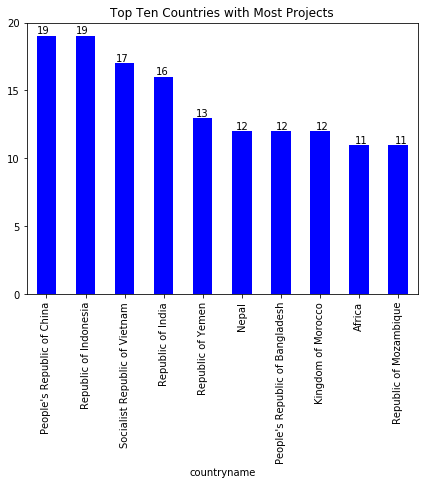

In [234]:
# Bar plot of Top Ten Countries and show the results on the bars.
ax = country_df.plot(kind='bar', color = 'b', yticks = (0,5,10,15,20), title = 'Top Ten Countries with Most Projects', figsize = (7,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.01))
plt.show()

# Second question is to find the top 10 major project themes (using column 'mjtheme_namecode'). 

In [235]:
# First we depict the column which consists of code and name pairs. Once we check the data out we see that 
# the data is a json object.  
print (type(df['mjtheme_namecode']))
print (df.loc[0:15:,'mjtheme_namecode'])

<class 'pandas.core.series.Series'>
0     [{u'code': u'8', u'name': u'Human development'...
1     [{u'code': u'1', u'name': u'Economic managemen...
2     [{u'code': u'5', u'name': u'Trade and integrat...
3     [{u'code': u'7', u'name': u'Social dev/gender/...
4     [{u'code': u'5', u'name': u'Trade and integrat...
5     [{u'code': u'6', u'name': u'Social protection ...
6     [{u'code': u'2', u'name': u'Public sector gove...
7     [{u'code': u'11', u'name': u'Environment and n...
8     [{u'code': u'10', u'name': u'Rural development...
9     [{u'code': u'2', u'name': u'Public sector gove...
10    [{u'code': u'10', u'name': u'Rural development...
11    [{u'code': u'10', u'name': u'Rural development...
12                      [{u'code': u'4', u'name': u''}]
13    [{u'code': u'5', u'name': u'Trade and integrat...
14    [{u'code': u'6', u'name': u'Social protection ...
15    [{u'code': u'10', u'name': u'Rural development...
Name: mjtheme_namecode, dtype: object


In [236]:
# What we can see that mjtheme_namecode column is a list of json objects, we need to flatten it into a dataframe.

def df_theme():
    j_list = df['mjtheme_namecode'].tolist()
    dfj=[json_normalize(j_ls) for j_ls in j_list]
    return pd.concat(dfj, ignore_index = True)
df_th = df_theme()

In [237]:
df_th.head(5)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [238]:
df_th.nunique()

code    11
name    12
dtype: int64

In [239]:
# As we can see there is no missing code but there are 122 missing names in the name column. 
print (df_th[df_th.code == ''].count())
print (df_th[df_th.name == ''].count())

code    0
name    0
dtype: int64
code    122
name    122
dtype: int64


In [ ]:
#In order to find the code and name pair 

In [240]:
df_th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
code    1499 non-null object
name    1499 non-null object
dtypes: object(2)
memory usage: 23.5+ KB


In [241]:
df_th1 = df_th.drop_duplicates()

In [242]:
df_th1 = df_th1[df_th1.name != '']

In [243]:
df_th1 = df_th1.reset_index()

In [244]:
df_th1

,index,code,name
0,0,8,Human development
1,2,1,Economic management
2,3,6,Social protection and risk management
3,4,5,Trade and integration
4,5,2,Public sector governance
5,6,11,Environment and natural resources management
6,8,7,Social dev/gender/inclusion
7,11,4,Financial and private sector development
8,18,10,Rural development
9,53,9,Urban development


In [245]:
f_df_th = pd.merge(df_th, df_th1, on='code', suffixes=('_x','')).drop('name_x' , axis=1)
f_df_th.head()

,code,index,name
0,8,0,Human development
1,8,0,Human development
2,8,0,Human development
3,8,0,Human development
4,8,0,Human development


In [246]:
f_df = f_df_th['name'].value_counts().sort_values(ascending=False)

In [247]:
f_df.head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

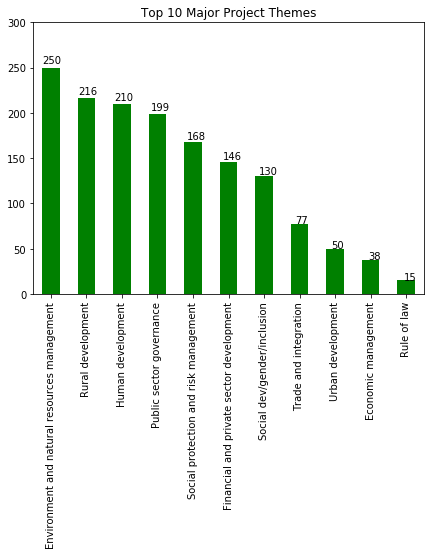

In [248]:
# In order to visualize the results in the bar graph we use matplotlib library.
ax = f_df.plot(kind='bar', color = 'green', yticks = (0,50,100,150,200,250,300), title = 'Top 10 Major Project Themes', figsize = (7,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
plt.show()

# In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

Third question was answered with the second one.